# 1.Panoramica del dataset

In [1]:
import pandas as pd

dataset = pd.read_csv("kindle_review.csv")
dataset.head()


,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [2]:
print('Dimensione del dataset: ', dataset.shape)

Dimensione del dataset:  (12000, 11)


# 2.Preprocessing del dataset

## Dataset cleaning

In [3]:
import Preprocessing

clean_dataset = Preprocessing.dataset_cleaning(dataset)

clean_dataset.head()

,rating,reviewText,summary
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,3,I'll start by saying this is the first of four...,Snapdragon Alley
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,4,I did not expect this type of book to be in li...,Book


In [4]:
print('Dimensione del dataset processato: ', clean_dataset.shape)

Dimensione del dataset processato:  (12000, 3)


## Aggiunta della colonna sentiment

In [5]:
clean_dataset = Preprocessing.addSentimentColumn(clean_dataset)
clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,0
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!,1
2,3,I'll start by saying this is the first of four...,Snapdragon Alley,0
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy,0
4,4,I did not expect this type of book to be in li...,Book,1


In [6]:
print('Numero occorrenze dei valori del sentimento:')
clean_dataset['sentiment'].value_counts()

Numero occorrenze dei valori del sentimento:


0    6000
1    6000
Name: sentiment, dtype: int64

## Grafico della distribuzione della colonna rating

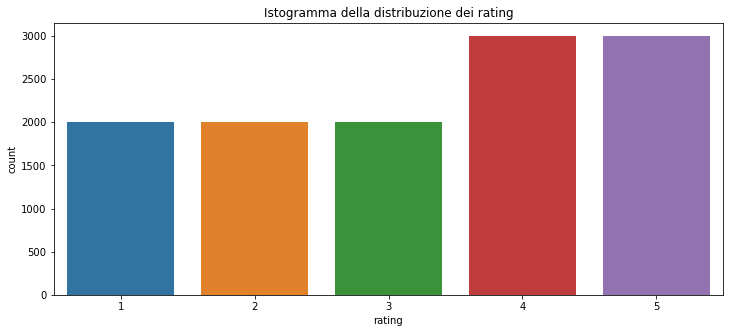

In [7]:
import Graph

Graph.rating_distribution(clean_dataset)

## Grafico della distribuzione della colonna sentiment

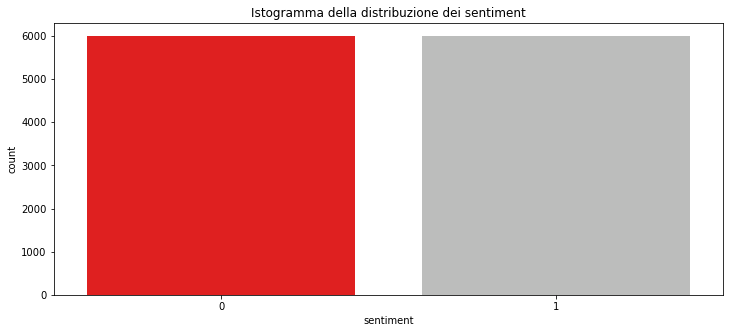

In [8]:
Graph.sentiment_distribution(clean_dataset)

# 3.Natural Language Processing

## Text Cleaning

### In questa sezione viene applicato il text cleaning della colonna reviewText, in cui vengono rimosse le stopword, i segni di punteggiatura e viene tokenizzato il testo

In [9]:
import NaturalLanguageProcessing

# rimozione dei segni di punteggiatura
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: NaturalLanguageProcessing.remove_punctuation(text))

# rimozione delle stopword
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: NaturalLanguageProcessing.remove_stopwords(text))

# lowering di ongni lettera
clean_dataset = NaturalLanguageProcessing.text_lowerer(clean_dataset)

# lemmatizzazione delle parole
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: NaturalLanguageProcessing.lemmatize_words(text))

clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,jace rankin may short he nothing mess man haul...,Entertaining But Average,0
1,5,great short read i didnt want put i read one s...,Terrific menage scenes!,1
2,3,ill start say first four book i wasnt expect 3...,Snapdragon Alley,0
3,3,aggie angela lansbury carry pocketbook instead...,very light murder cozy,0
4,4,i expect type book library please find price r...,Book,1


# 4.Algoritmi supervisionati

## In questa sezione vengono applicati gli algoritmi supervisionati

### Classificatore bayesiano

In [11]:
import Supervised

reviewText = clean_dataset['reviewText']
sentiment = clean_dataset['sentiment']

Supervised.multinb(reviewText, sentiment)


ValueError: dimension mismatch